In [53]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import io
import os
import warnings
import re

In [54]:
import tensorflow.keras as keras

In [55]:
train_data = pd.read_csv("./titanic/train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [56]:
test_data = pd.read_csv("./titanic/test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 移除 Unique 的資料

In [57]:
train_X = train_data.drop(['PassengerId','Name', 'Ticket'], axis = 1)
train_X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


## Null Data
- Age: About 20%, try to fill it!
- Cabin have too many NA, so we drop it
- Embarked have a very small percentage
    - Def: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
    - Drop NA row? (V)
    - fill it?

In [58]:
# count NA for each feature
data_na_sum = train_X.isnull().sum()
# count null percentage for each feature
data_na_per = (data_na_sum / len(train_X))*100

data_na_per

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [59]:
# drop Cabin column
train_X = train_X.drop('Cabin', axis = 1)
train_X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [60]:
# See NA in row at Embarked
train_X['Embarked'].isnull().sum()

2

In [61]:
# drop row that Embarked==NA
train_X = train_X.dropna(subset=['Embarked'])
train_X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [62]:
# Age NA 的部分
age_na_idx = train_X.Age.isna()
train_X[age_na_idx]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


In [63]:
train_y = train_X['Survived']
train_X = train_X.drop('Survived', axis = 1)
train_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [64]:
#以該欄位所有資料的算術平均數做填補
#data.Age.fillna(data.Age.mean())
#以該欄位所有資料的中位數做填補
train_X = train_X.fillna(train_X.Age.median())
#以0填補
#data.Age.fillna(0)
#以-999填補
#data.Age.fillna(-999)
#train_data[age_na_idx]

In [65]:
# Check no na: count NA for each feature
train_X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Change Type: encode
- Sex
- Embarked

In [66]:
train_X.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [67]:
train_X = pd.get_dummies(train_X, columns = ['Sex','Embarked'])
pd.DataFrame(train_X)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [68]:
train_X.dtypes

Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

## Imbalance?

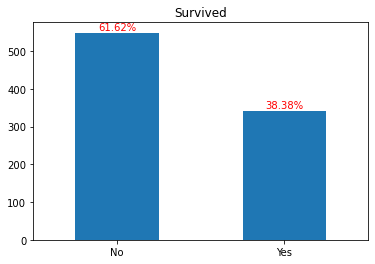

In [69]:
fig, ax = plt.subplots()
ax = train_data['Survived'].value_counts().plot(kind='bar', title = 'Survived')
ax.set_xticklabels(['No', 'Yes'], rotation=0)

#ax.legend()
for i, v in enumerate(list(train_data['Survived'].value_counts())):
    
    plt.text(i, v+8, str('{:.2f}%'.format(v/len(train_data)*100)), ha = 'center', ma = 'center', color = 'r')


In [70]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

men = train_data[train_data['Sex'] == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of women who survived:", rate_women)
print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


## 分析 feature
- Correlation heatmap can observes the correlation between features.
    - Reult shows that there are no common feature in our data

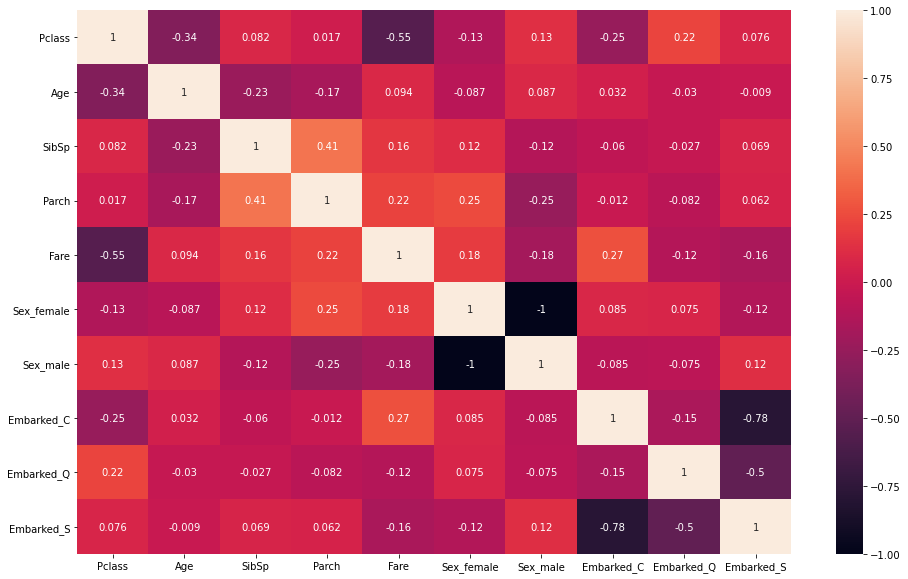

In [71]:
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(train_X.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

## Model

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

sc = StandardScaler()
X = sc.fit_transform(train_X)
#X_test = sc.fit_transform(train_y)
y = np.array(train_y).ravel()

kf = KFold(n_splits=5)
kf.get_n_splits(X)

ind_round = 1

classifier = keras.Sequential()

classifier.add(Dense(units = 3,activation = 'sigmoid', input_dim = 10))

classifier.add(Dense(units = 2, activation = 'sigmoid'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

for train_index, test_index in kf.split(X):
    
    print("ROUND: "+str(ind_round))
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    classifier.fit(X_train, y_train,  epochs = 100)
    
    classifier.evaluate(X_test, y_test)
    #print(classifier.predict(X_test))
    
    ind_round += 1

ROUND: 1
Epoch 1/100
23/23 [==============================] - 0s 858us/step - loss: 0.9709 - accuracy: 0.3966
Epoch 2/100
23/23 [==============================] - 0s 953us/step - loss: 0.9396 - accuracy: 0.3966
Epoch 3/100
23/23 [==============================] - 0s 959us/step - loss: 0.9113 - accuracy: 0.3966
Epoch 4/100
23/23 [==============================] - 0s 861us/step - loss: 0.8851 - accuracy: 0.3966
Epoch 5/100
23/23 [==============================] - 0s 863us/step - loss: 0.8620 - accuracy: 0.3966
Epoch 6/100
23/23 [==============================] - 0s 907us/step - loss: 0.8413 - accuracy: 0.3966
Epoch 7/100
23/23 [==============================] - 0s 862us/step - loss: 0.8225 - accuracy: 0.3966
Epoch 8/100
23/23 [==============================] - 0s 771us/step - loss: 0.8050 - accuracy: 0.3966
Epoch 9/100
23/23 [==============================] - 0s 816us/step - loss: 0.7891 - accuracy: 0.3966
Epoch 10/100
23/23 [==============================] - 0s 816us/step - loss: 0.7751

23/23 [==============================] - 0s 771us/step - loss: 0.4468 - accuracy: 0.8158
Epoch 60/100
23/23 [==============================] - 0s 861us/step - loss: 0.4462 - accuracy: 0.8158
Epoch 61/100
23/23 [==============================] - 0s 771us/step - loss: 0.4454 - accuracy: 0.8172
Epoch 62/100
23/23 [==============================] - 0s 771us/step - loss: 0.4446 - accuracy: 0.8158
Epoch 63/100
23/23 [==============================] - 0s 861us/step - loss: 0.4441 - accuracy: 0.8158
Epoch 64/100
23/23 [==============================] - 0s 907us/step - loss: 0.4434 - accuracy: 0.8158
Epoch 65/100
23/23 [==============================] - 0s 861us/step - loss: 0.4427 - accuracy: 0.8158
Epoch 66/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.8158
Epoch 67/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4413 - accuracy: 0.8172
Epoch 68/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4408 - accuracy: 0.8172

23/23 [==============================] - 0s 861us/step - loss: 0.4006 - accuracy: 0.8397
Epoch 17/100
23/23 [==============================] - 0s 861us/step - loss: 0.4006 - accuracy: 0.8397
Epoch 18/100
23/23 [==============================] - 0s 816us/step - loss: 0.4004 - accuracy: 0.8411
Epoch 19/100
23/23 [==============================] - 0s 907us/step - loss: 0.4002 - accuracy: 0.8397
Epoch 20/100
23/23 [==============================] - 0s 816us/step - loss: 0.4000 - accuracy: 0.8397
Epoch 21/100
23/23 [==============================] - 0s 816us/step - loss: 0.3999 - accuracy: 0.8397
Epoch 22/100
23/23 [==============================] - 0s 725us/step - loss: 0.3998 - accuracy: 0.8383
Epoch 23/100
23/23 [==============================] - 0s 771us/step - loss: 0.3996 - accuracy: 0.8383
Epoch 24/100
23/23 [==============================] - 0s 725us/step - loss: 0.3995 - accuracy: 0.8383
Epoch 25/100
23/23 [==============================] - 0s 771us/step - loss: 0.3994 - accuracy: 

23/23 [==============================] - 0s 771us/step - loss: 0.4204 - accuracy: 0.8216
Epoch 76/100
23/23 [==============================] - 0s 816us/step - loss: 0.4203 - accuracy: 0.8216
Epoch 77/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4202 - accuracy: 0.8216
Epoch 78/100
23/23 [==============================] - 0s 952us/step - loss: 0.4202 - accuracy: 0.8216
Epoch 79/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8216
Epoch 80/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8202
Epoch 81/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8202
Epoch 82/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8202
Epoch 83/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4200 - accuracy: 0.8216
Epoch 84/100
23/23 [==============================] - 0s 997us/step - loss: 0.4200 - accuracy: 0.8202
Epoch

In [74]:
# Preprocessing Test Data
test_X = test_data.drop(['PassengerId','Name', 'Ticket'], axis = 1)
# drop Cabin column
test_X = test_X.drop('Cabin', axis = 1)
# drop row that Embarked==NA
test_X = test_X.dropna(subset=['Embarked'])

test_X = test_X.fillna(test_X.Age.median())




test_X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [75]:
test_X = pd.get_dummies(test_X, columns = ['Sex','Embarked'])
pd.DataFrame(test_X)


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,27.0,0,0,8.0500,0,1,0,0,1


In [76]:
test_X.dtypes

Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [77]:
sc = StandardScaler()
test_X = sc.fit_transform(test_X)


In [78]:
predictions = classifier.predict(test_X)
predictions

In [79]:
submission = pd.read_csv('./titanic/gender_submission.csv')
submission['Survived'] = predictions
submission.to_csv('submission_lab1.csv', index=False)